<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ktrain

![](https://lh3.googleusercontent.com/proxy/euQu_twmHKZi8mKUKNlhpt4cTCXILRa1Cxn9WM22RG7qJ1SmY-Lu7Ezat-EZ1TtJoDozfFjm1Fv0ObGC1Ec3bLVIpMz-ODHCmAeWNL85-jrH2b0luScB)

# Install

In [1]:
!pip install ktrain
!pip install shap

     |████████████████████████████████| 25.3 MB 100 kB/s 
     |████████████████████████████████| 6.8 MB 37.0 MB/s 
     |████████████████████████████████| 981 kB 54.7 MB/s 
     |████████████████████████████████| 263 kB 70.9 MB/s 
     |████████████████████████████████| 1.9 MB 66.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.9 MB/s 
     |████████████████████████████████| 468 kB 20.5 MB/s 
     |████████████████████████████████| 895 kB 46.1 MB/s 
     |████████████████████████████████| 3.3 MB 46.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=56aca241538fbcbfadb30bcf73ec9a579ac8c2fd29d9ec542cea97acab90afd0
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=848d838b92e114c26a53d922af661ef374ff637092da5721af9368c84deed5d5
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

import ktrain
from ktrain import tabular

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Ktrain Library
* Inspired by work at FastAI
* Low code library wrapping keras
* https://arxiv.org/pdf/2004.10703.pdf

# Data

## Pull Data

In [3]:
!wget -O credit.dat https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
!wget -O names.dat https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.names

--2021-09-30 08:50:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘credit.dat’

credit.dat          100%[===================>]  31.46K  --.-KB/s    in 0.06s   

2021-09-30 08:50:16 (489 KB/s) - ‘credit.dat’ saved [32218/32218]

--2021-09-30 08:50:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/credit.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522 [application/x-httpd-php]
Saving to: ‘names.dat’

names.dat           100%[===================>]     522  --.-KB/s    in 0s      

20

In [4]:
!cat names.dat

1. Title: Japanese Credit Screening (examples & domain theory)

2. Source information:
   -- Creators: Chiharu Sano 
   -- Donor: Chiharu Sano
             csano@bonnie.ICS.UCI.EDU
   -- Date: 3/19/92

3. Past usage: 
   -- None Published

4. Relevant information:
   --  Examples represent positive and negative instances of people who were and were not 
       granted credit.
   --  The theory was generated by talking to the individuals at a Japanese company that grants
       credit.

5. Number of instances: 125





In [5]:
!head credit.dat

b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4,u,g,m,v,2.5,t,f,0,t,g,00360,0,+
b,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,00164,31285,+
a,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,00080,1349,+
b,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,00180,314,+
b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


## Load Data

In [6]:
credit_df = pd.read_csv('credit.dat', header=None)
credit_df.columns = ['CAT1',
'NUM1',
'NUM2',
'CAT2',
'CAT3', 
'CAT4',
'CAT5',
'NUM3',
'CAT6',
'CAT7',
'NUM4',
'CAT8',
'CAT9',
'NUM5',
'NUM6',
'TARGET'
]
credit_df

,CAT1,NUM1,NUM2,CAT2,CAT3,CAT4,CAT5,NUM3,CAT6,CAT7,NUM4,CAT8,CAT9,NUM5,NUM6,TARGET
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [7]:
# Convert target from + - to numeric
credit_df['TARGET'] = np.where(credit_df.TARGET == '+', 1, 0)
credit_df.head()

,CAT1,NUM1,NUM2,CAT2,CAT3,CAT4,CAT5,NUM3,CAT6,CAT7,NUM4,CAT8,CAT9,NUM5,NUM6,TARGET
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [8]:
# Numerics are coming in as strings
credit_df.NUM5.unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', '?', '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [9]:
# Unknown data flagged with an ?
credit_df[credit_df.NUM5 == '?']

,CAT1,NUM1,NUM2,CAT2,CAT3,CAT4,CAT5,NUM3,CAT6,CAT7,NUM4,CAT8,CAT9,NUM5,NUM6,TARGET
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,0
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,1
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,1
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,1
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,1
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,0
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,0
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,0
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,0
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,0


# Missing Data

In [10]:
credit_df = credit_df.replace('?', np.NaN)
credit_df['NUM5'] = credit_df.NUM5.astype(float)
credit_df.isna().sum()

CAT1      12
NUM1      12
NUM2       0
CAT2       6
CAT3       6
CAT4       9
CAT5       9
NUM3       0
CAT6       0
CAT7       0
NUM4       0
CAT8       0
CAT9       0
NUM5      13
NUM6       0
TARGET     0
dtype: int64

In [11]:
def impute_categorical(df, col):
  df.loc[pd.isnull(df[col]), col] = 'UNKNOWN'
  return df

for col in [f'CAT{x}' for x in range(1, 10)]:
  credit_df = impute_categorical(credit_df, col)

credit_df.isna().sum()

CAT1       0
NUM1      12
NUM2       0
CAT2       0
CAT3       0
CAT4       0
CAT5       0
NUM3       0
CAT6       0
CAT7       0
NUM4       0
CAT8       0
CAT9       0
NUM5      13
NUM6       0
TARGET     0
dtype: int64

In [12]:
def impute_numeric(df, col):
  df[col] = df[col].astype(float)
  missing = df[col].isna().sum()
  if missing > 0:
    df[f'{col}_IMPUTED'] = np.where(pd.isnull(df[col]), 1, 0)
    df.loc[pd.isnull(df[col]), col] = df[col].mean()
  return df

for col in [f'NUM{x}' for x in range(1, 7)]:
  credit_df = impute_numeric(credit_df, col)

credit_df.isna().sum()

CAT1            0
NUM1            0
NUM2            0
CAT2            0
CAT3            0
CAT4            0
CAT5            0
NUM3            0
CAT6            0
CAT7            0
NUM4            0
CAT8            0
CAT9            0
NUM5            0
NUM6            0
TARGET          0
NUM1_IMPUTED    0
NUM5_IMPUTED    0
dtype: int64

# Split Data

In [13]:
train_df, test_df = train_test_split(credit_df, test_size=25, random_state=505)

# KTrain

## Tabular Task
* Can handle missing values
* But, can't automatically process ? as Missing

In [14]:
train, val, preprocess = tabular.tabular_from_df(train_df, 
                                                 label_columns=['TARGET'], 
                                                 random_state=505)

processing train: 595 rows x 18 columns
['not_TARGET', 'TARGET']
     not_TARGET  TARGET
187         0.0     1.0
134         0.0     1.0
266         1.0     0.0
610         1.0     0.0
539         1.0     0.0

The following integer column(s) are being treated as categorical variables:
['NUM1_IMPUTED', 'NUM5_IMPUTED']
To treat any of these column(s) as numerical, cast the column to float in DataFrame or CSV
 and re-run tabular_from* function.

processing test: 70 rows x 18 columns
['not_TARGET', 'TARGET']
     not_TARGET  TARGET
116         1.0     0.0
14          0.0     1.0
250         0.0     1.0
124         0.0     1.0
647         1.0     0.0


## Create Model
* We may have a number of models to select from
* For tabular, we have the MLP (Multi Layer Perceptron)
* The MLP paper references *Entity Embeddings of Categorical Variables*
  * Paper looks at the use of embeddings in structured datasets
  * Notes prior work and effectiveness in language processing
  * Discusses theory & experimentation on sizing embeddings 
  * Authors won the Rossman Kaggle challenge

In [15]:
tabular.print_tabular_classifiers()

mlp: a configurable multilayer perceptron with categorical variable embeddings [https://arxiv.org/abs/1604.06737]


In [16]:
model = tabular.tabular_classifier('mlp', train)

Is Multi-Label? False
done.


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

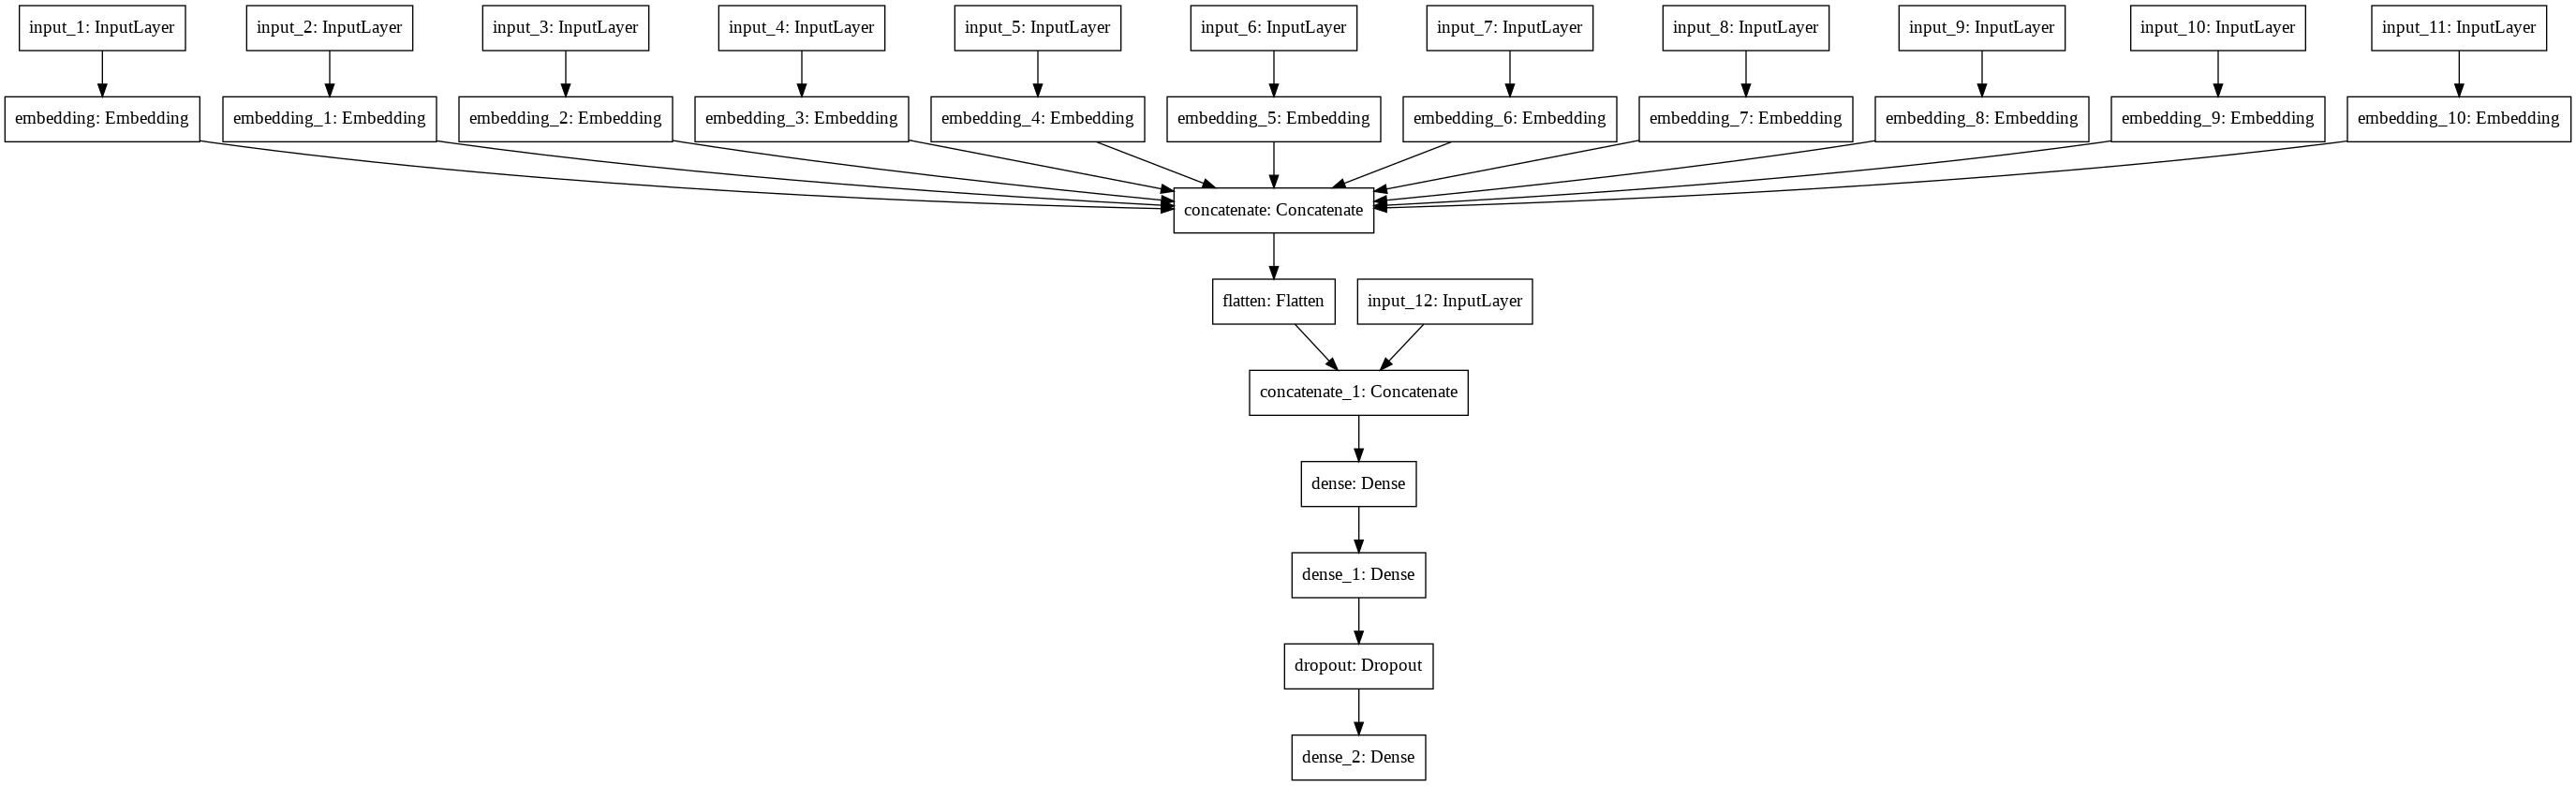

In [18]:
tabular.models.plot_model(model)

In [19]:
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)

## Find Learning Rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
18/18 [==============================] - 2s 26ms/step - loss: 0.7035 - accuracy: 0.4352
Epoch 2/5
18/18 [==============================] - 1s 28ms/step - loss: 0.6972 - accuracy: 0.4956
Epoch 3/5
18/18 [==============================] - 1s 28ms/step - loss: 0.5739 - accuracy: 0.7353
Epoch 4/5
18/18 [==============================] - 1s 28ms/step - loss: 2.3043 - accuracy: 0.6838
Epoch 5/5
18/18 [==============================] - 0s 5ms/step - loss: 54.6707 - accuracy: 0.6016


done.
Visually inspect loss plot and select learning rate associated with falling loss


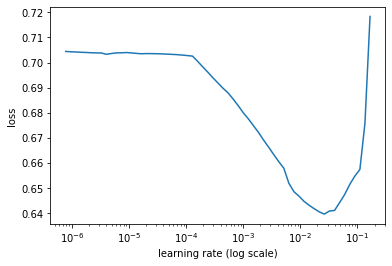

In [20]:
learner.lr_find(show_plot=True, max_epochs=5)

## Fit Model

In [21]:
learner.fit_onecycle(1e-3, 10)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/10
19/19 [==============================] - 3s 57ms/step - loss: 0.6222 - accuracy: 0.6622 - val_loss: 0.5594 - val_accuracy: 0.7143
Epoch 2/10
19/19 [==============================] - 1s 36ms/step - loss: 0.5204 - accuracy: 0.7529 - val_loss: 0.5493 - val_accuracy: 0.7286
Epoch 3/10
19/19 [==============================] - 1s 36ms/step - loss: 0.4753 - accuracy: 0.7882 - val_loss: 0.5353 - val_accuracy: 0.7429
Epoch 4/10
19/19 [==============================] - 1s 32ms/step - loss: 0.4412 - accuracy: 0.8034 - val_loss: 0.5301 - val_accuracy: 0.7429
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 0.3859 - accuracy: 0.8471 - val_loss: 0.4235 - val_accuracy: 0.8000
Epoch 6/10
19/19 [==============================] - 1s 32ms/step - loss: 0.3198 - accuracy: 0.8706 - val_loss: 0.4446 - val_accuracy: 0.8143
Epoch 7/10
19/19 [==============================] - 1s 31ms/step - loss: 0.2869 - accuracy:

## Score

In [22]:
# Validating the moel runs the scoring on the validation test set
learner.validate()

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        36
           1       0.84      0.76      0.80        34

    accuracy                           0.81        70
   macro avg       0.82      0.81      0.81        70
weighted avg       0.82      0.81      0.81        70



array([[31,  5],
       [ 8, 26]])

In [23]:
# You can run this explicity passing the val dataset to evaluate
learner.evaluate(val, class_names=preprocess.get_classes())

              precision    recall  f1-score   support

  not_TARGET       0.79      0.86      0.83        36
      TARGET       0.84      0.76      0.80        34

    accuracy                           0.81        70
   macro avg       0.82      0.81      0.81        70
weighted avg       0.82      0.81      0.81        70



array([[31,  5],
       [ 8, 26]])

## Predict

In [24]:
# To predict, we make a predictor combining the model and preprocessor
predictor = ktrain.get_predictor(learner.model, preprocess)
preds = predictor.predict(test_df, return_proba=True)
pred_class = np.argmax(preds, axis=1)

['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         0.0     1.0
594         0.0     1.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0


In [25]:
# Evaluate on the test dataset
learner.evaluate(preprocess.preprocess_test(test_df), 
                 class_names=preprocess.get_classes())

processing test: 25 rows x 18 columns
['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         0.0     1.0
594         0.0     1.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0
              precision    recall  f1-score   support

  not_TARGET       0.90      0.90      0.90        20
      TARGET       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



array([[18,  2],
       [ 2,  3]])

In [26]:
# KTrain's Evaluation for Classification wraps ClassificationReport
print(classification_report(test_df.TARGET, pred_class))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



## Analysis

In [27]:
# Where are our predictions failing?
pred_df = test_df.copy()
pred_df['PREDICTED'] = pred_class
pred_df[pred_df.PREDICTED != pred_df.TARGET]

,CAT1,NUM1,NUM2,CAT2,CAT3,CAT4,CAT5,NUM3,CAT6,CAT7,NUM4,CAT8,CAT9,NUM5,NUM6,TARGET,NUM1_IMPUTED,NUM5_IMPUTED,PREDICTED
502,a,64.08,0.165,u,g,ff,ff,0.000,t,t,1.0,f,g,232.0,100.0,1,0,0,0
594,b,38.67,0.210,u,g,k,v,0.085,t,f,0.0,t,g,280.0,0.0,1,0,0,0
104,b,27.83,4.000,y,p,i,h,5.750,t,t,2.0,t,g,75.0,0.0,0,0,0,1
101,b,35.25,16.500,y,p,c,v,4.000,t,f,0.0,f,g,80.0,0.0,0,0,0,1


['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         1.0     0.0
594         1.0     0.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0
Explanation for class = not_TARGET (row_index=502): 


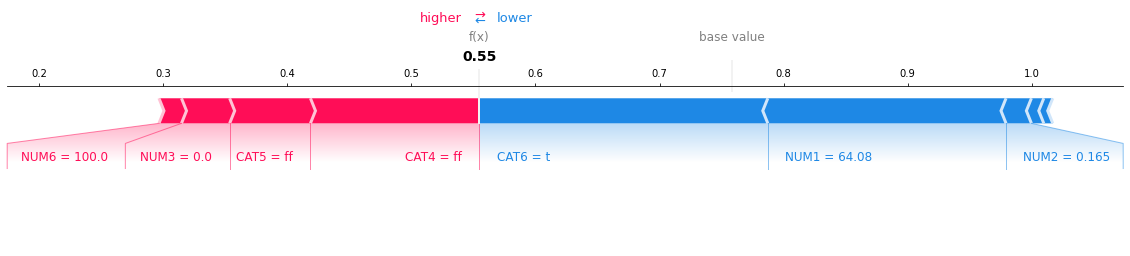

In [28]:
# Explain wraps shap (who doesn't these days?)
predictor.explain(test_df, row_index=502, class_id=0)

## Worst Predictions

In [29]:
# We can find the predictions that have the highest loss
learner.view_top_losses(val_data=preprocess.preprocess_test(test_df), preproc=preprocess, n=5)

processing test: 25 rows x 18 columns
['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         0.0     1.0
594         0.0     1.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0
----------
id:3 | loss:1.52 | true:not_TARGET | pred:TARGET)

----------
id:8 | loss:1.21 | true:not_TARGET | pred:TARGET)

----------
id:1 | loss:1.17 | true:TARGET | pred:not_TARGET)

----------
id:0 | loss:0.81 | true:TARGET | pred:not_TARGET)



In [30]:
test_df.iloc[5]

CAT1                a
NUM1            41.58
NUM2             1.04
CAT2                u
CAT3                g
CAT4               aa
CAT5                v
NUM3            0.665
CAT6                f
CAT7                f
NUM4                0
CAT8                f
CAT9                g
NUM5              240
NUM6              237
TARGET              0
NUM1_IMPUTED        0
NUM5_IMPUTED        0
Name: 675, dtype: object

['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         1.0     0.0
594         1.0     0.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0
Explanation for class = TARGET (row_num=5): 


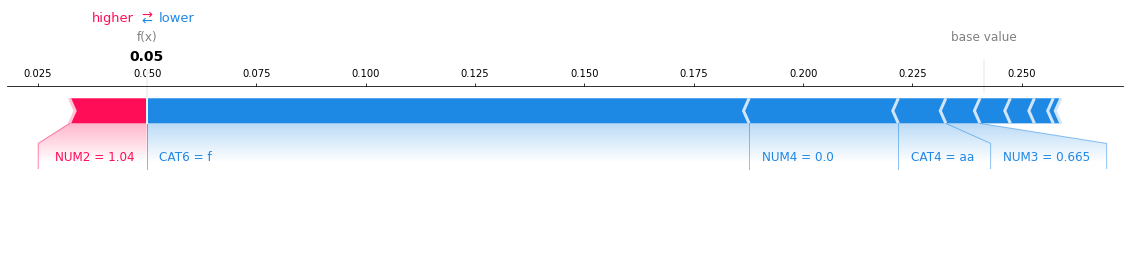

In [31]:
predictor.explain(test_df, row_num=5, class_id=1)

# Going Further

## Autofit
* Autofit adds two enhancements to the learning process
* Early stopping is enabled with patience level (default 5)
* Reduce on plateau learning rate with patience level (default 2)

In [32]:
model   = tabular.tabular_classifier('mlp', train)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.autofit(lr=1e-3)

Is Multi-Label? False
done.
early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
19/19 [==============================] - 2s 45ms/step - loss: 0.5549 - accuracy: 0.7345 - val_loss: 0.5671 - val_accuracy: 0.7000
Epoch 2/1024
19/19 [==============================] - 1s 32ms/step - loss: 0.4760 - accuracy: 0.7933 - val_loss: 0.5458 - val_accuracy: 0.6857
Epoch 3/1024
19/19 [==============================] - 1s 31ms/step - loss: 0.4447 - accuracy: 0.8101 - val_loss: 0.5403 - val_accuracy: 0.7571
Epoch 4/1024
19/19 [==============================] - 1s 31ms/step - loss: 0.3866 - accuracy: 0.8370 - val_loss: 0.4782 - val_accuracy: 0.7714
Epoch 5/1024
19/19 [==============================] - 1s 32ms/step - loss: 0.3361 - accuracy: 0.8538 - val_loss: 0.4742 - val_accuracy: 0.7857
Epoch 6/1024
19/19 [==============================] - 1s 33ms/step - loss

In [33]:
# Autofit performed comparably with the fit_onecycle approach
learner.evaluate()

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.86      0.88      0.87        34

    accuracy                           0.87        70
   macro avg       0.87      0.87      0.87        70
weighted avg       0.87      0.87      0.87        70



array([[31,  5],
       [ 4, 30]])

In [34]:
# Evaluate on the test dataset
learner.evaluate(preprocess.preprocess_test(test_df), 
                 class_names=preprocess.get_classes())

processing test: 25 rows x 18 columns
['not_TARGET', 'TARGET']
     not_TARGET  TARGET
502         0.0     1.0
594         0.0     1.0
376         1.0     0.0
104         1.0     0.0
372         1.0     0.0
              precision    recall  f1-score   support

  not_TARGET       0.90      0.90      0.90        20
      TARGET       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



array([[18,  2],
       [ 2,  3]])

## Plotting History
* There are plotting helpers built into the library

In [35]:
model   = tabular.tabular_classifier('mlp', train)
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.autofit(lr=1e-3)

Is Multi-Label? False
done.
early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/1024
19/19 [==============================] - 3s 44ms/step - loss: 0.5676 - accuracy: 0.7025 - val_loss: 0.5444 - val_accuracy: 0.7571
Epoch 2/1024
19/19 [==============================] - 1s 31ms/step - loss: 0.4759 - accuracy: 0.7748 - val_loss: 0.5418 - val_accuracy: 0.7429
Epoch 3/1024
19/19 [==============================] - 1s 30ms/step - loss: 0.4406 - accuracy: 0.8168 - val_loss: 0.5623 - val_accuracy: 0.7571
Epoch 4/1024
19/19 [==============================] - 1s 31ms/step - loss: 0.3883 - accuracy: 0.8319 - val_loss: 0.5055 - val_accuracy: 0.7714
Epoch 5/1024
19/19 [==============================] - 1s 32ms/step - loss: 0.3351 - accuracy: 0.8706 - val_loss: 0.4781 - val_accuracy: 0.7714
Epoch 6/1024
19/19 [==============================] - 1s 32ms/step - loss

In [36]:
for key in model.history.history.keys():
  print(key)

loss
accuracy
val_loss
val_accuracy
lr
iterations
momentum


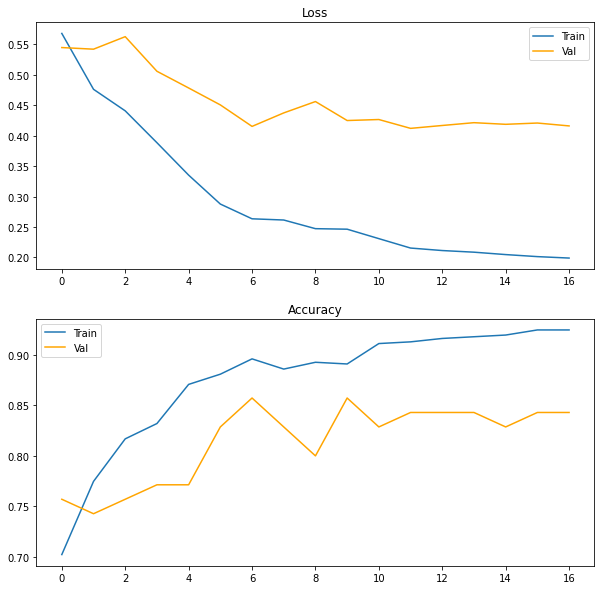

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(model.history.history['loss'], label='Train');
ax[0].plot(model.history.history['val_loss'], color='orange', label='Val');
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(model.history.history['accuracy'], label='Train');
ax[1].plot(model.history.history['val_accuracy'], color='orange', label='Val');
ax[1].set_title('Accuracy')
ax[1].legend()

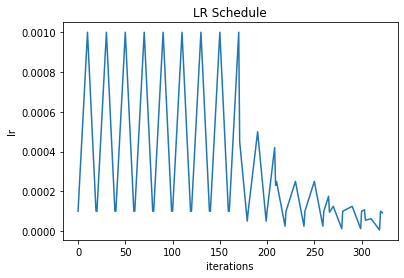

In [38]:
# Plotting is built in and can save us some steps
learner.plot('lr')

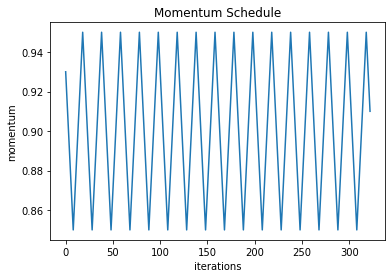

In [39]:
learner.plot('momentum')

## Weight Decay
* Ktrain doesn't use weight decay
* Weight decay is L2 regularization applied at update time rather than in the loss function
* We can add in global weight decay

In [40]:
# No Weight Decay
learner.get_weight_decay()

In [41]:
# Easy to add -- default = 0.01
learner.set_weight_decay()

recompiling model to use AdamWeightDecay as opimizer with weight decay of 0.01


## Custom Models 
* If the MLP has 5MM+ Parameters, why doesn't it solve this?
* There are ~30,000 pieces of information
* Let's make a custom model (one without embeddings)

In [42]:
custom_df = credit_df.copy()
custom_df = pd.get_dummies(custom_df, columns = [f'CAT{x}' for x in range(1, 10)]) 
for col in [f'NUM{x}' for x in range(1, 7)]:
  custom_df[col] = (custom_df[col] - custom_df[col].mean()) / custom_df[col].std()
custom_df

,NUM1,NUM2,NUM3,NUM4,NUM5,NUM6,TARGET,NUM1_IMPUTED,NUM5_IMPUTED,CAT1_UNKNOWN,CAT1_a,CAT1_b,CAT2_UNKNOWN,CAT2_l,CAT2_u,CAT2_y,CAT3_UNKNOWN,CAT3_g,CAT3_gg,CAT3_p,CAT4_UNKNOWN,CAT4_aa,CAT4_c,CAT4_cc,CAT4_d,CAT4_e,CAT4_ff,CAT4_i,CAT4_j,CAT4_k,CAT4_m,CAT4_q,CAT4_r,CAT4_w,CAT4_x,CAT5_UNKNOWN,CAT5_bb,CAT5_dd,CAT5_ff,CAT5_h,CAT5_j,CAT5_n,CAT5_o,CAT5_v,CAT5_z,CAT6_f,CAT6_t,CAT7_f,CAT7_t,CAT8_f,CAT8_t,CAT9_g,CAT9_p,CAT9_s
0,-0.062276,-0.955920,-0.290872,-0.287892,0.104469,-0.195272,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0
1,2.286443,-0.060007,0.244013,0.740293,-0.819095,-0.087788,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0
2,-0.596305,-0.855481,-0.216167,-0.493529,0.557537,-0.037117,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
3,-0.315370,-0.646569,0.456175,0.534656,-0.488006,-0.194696,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0
4,-0.961605,0.174015,-0.153415,-0.493529,-0.371835,-0.195272,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,-0.884833,1.069928,-0.290872,-0.493529,0.441366,-0.195272,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0
686,-0.750693,-0.805262,-0.066758,-0.082255,0.092851,-0.119649,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0
687,-0.533032,1.755924,-0.066758,-0.287892,0.092851,-0.195080,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0
688,-1.151426,-0.914740,-0.652442,-0.493529,0.557537,-0.051321,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [43]:
X = custom_df.copy()
y = custom_df.pop('TARGET')
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=777)
X_val, X_test, y_val, y_test   = train_test_split(X_val, y_val, test_size=25, random_state=777)
print(f'Train {X_train.shape}')

Train (586, 54)


In [44]:
# Simple model - sequential (Dense layers, Relu)
custom_model = Sequential()
custom_model.add(Dense(64, activation='relu', input_shape=(54,)))
custom_model.add(Dense(32, activation='relu'))
custom_model.add(Dense(1, activation='sigmoid'))
custom_model.build()
custom_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                3520      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [45]:
custom_model.compile(loss='binary_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

In [46]:
learner = ktrain.get_learner(custom_model, 
                             train_data=(X_train.to_numpy(), y_train.to_numpy()), 
                             val_data=(X_val.to_numpy(), y_val.to_numpy()), 
                             batch_size=32)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
19/19 [==============================] - 1s 3ms/step - loss: 0.7204 - accuracy: 0.5375
Epoch 2/5
19/19 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.5410
Epoch 3/5
19/19 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6468
Epoch 4/5
19/19 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8874
Epoch 5/5
19/19 [==============================] - 0s 2ms/step - loss: 263.4290 - accuracy: 0.7139


done.
Visually inspect loss plot and select learning rate associated with falling loss


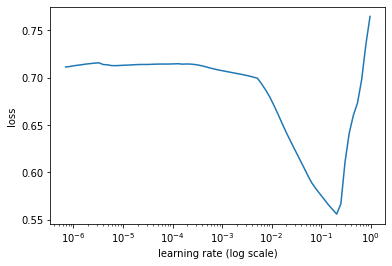

In [47]:
learner.lr_find(show_plot=True, max_epochs=5)

In [48]:
learner.fit_onecycle(1e-2, 10)



begin training using onecycle policy with max lr of 0.01...
Epoch 1/10
19/19 [==============================] - 1s 11ms/step - loss: 0.5932 - accuracy: 0.7031 - val_loss: 0.4123 - val_accuracy: 0.8481
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8805 - val_loss: 0.2241 - val_accuracy: 0.9114
Epoch 3/10
19/19 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9403 - val_loss: 0.1250 - val_accuracy: 0.9620
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9949 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 9.6415e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 0s 4ms/step - loss: 5.3900e-04 - accuracy

In [49]:
# Perfect performance on evaluation
learner.validate()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        27

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



array([[52,  0],
       [ 0, 27]])

In [50]:
# Appears to have nailed it
learner.evaluate(test_data=(X_test.to_numpy(), y_test.to_numpy()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



array([[11,  0],
       [ 0, 14]])

# Notes:
* Helpful library - Think PyCaret for Tensorflow / Keras
  * Like the learning rate helper
  * Can put in your own model is a plus
* We only looked at Tabular model
* Our dataset to explore the tool, was really small
  * Embeddings didn't help with it
  * A simple net performed better
  * Expect that to **change** on other, larger datasets
* The library supports many other data types including
  * Images
  * Text
  * Regression
  * Time Series